# Housing affordability

Specifically, we want to look at national data and compare it with New Mexico (NM), where the case study for the story is located.

In [1]:
# importing libraries
import pandas as pd
import os

In [2]:
os.makedirs("filtered-data", exist_ok=True)

In [3]:
# filter national and New Mexico data
def filter_nm(csv, col_name):
    """
    This function creates a dataframe from a csv file,
    then filters a column to keep only the national data and rows with NM (New Mexico) identified as a state.
    
    Parameters:
    csv (str) = path of csv file
    col_name (str) = name of column to filter
    """

    df = pd.read_csv(csv)
    # filtered_df = df.query(f"{col_name} == 'NM' or {col_name} == 'New Mexico' or  == 'United States'")
    # filtered_df = df[df[col_name].isin(["NM", "New Mexico", "United States"])]
    filtered_df = df[df[col_name].str.contains("NM|New Mexico|United States", na=False)]
    filtered_df.columns = filtered_df.columns.str.strip()
    return filtered_df

In [4]:
# transpose df for charting
def chart_nm (df, drop_cols, index_col):
    """
    This function drops columns not needed for the chart
    and transposes a DataFrame.

    Parameters:
    df (pd.DataFrame) = name of dataframe
    drop_cols (list) = list of column names to drop
    index_col (str) = name of column name to set as new column headers
    """
    
    df = df.drop(columns=drop_cols, inplace=False)
    df.set_index(index_col, inplace=True)
    transposed_df = df.transpose()
    return transposed_df

In [5]:
# repeated variables

col_name = "RegionName"
col_exclude = ["RegionID", "SizeRank", "RegionType", "StateName"]
index_col = "RegionName"

### New Homeowner Affordability

A measure of the share of income the median household would spend on a newly purchased home, including its mortgage payment, homeowner’s insurance, property taxes, and maintenance costs. Typically, spending more than 30% of income on housing is considered unaffordable.

In [6]:
csv = "data/Metro_new_homeowner_affordability_downpayment_0.20_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"

df_home_afford = filter_nm(csv, col_name)
df_home_afford

,RegionID,SizeRank,RegionName,RegionType,StateName,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,...,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28
0,102001,0,United States,country,NaN,0.215322,0.214520,0.215557,0.214955,0.213329,...,0.366279,0.361851,0.359164,0.348714,0.340274,0.346607,0.356531,0.353624,0.361045,0.358211
61,394312,62,"Albuquerque, NM",msa,NM,0.233712,0.232673,0.233564,0.232275,0.229558,...,0.381328,0.376320,0.373309,0.362253,0.353843,0.361113,0.372325,0.369730,0.378444,0.376149
207,394773,214,"Las Cruces, NM",msa,NM,0.270200,0.269310,0.271419,0.271372,0.269595,...,0.373151,0.368443,0.365562,0.354687,0.346188,0.353280,0.363713,0.360117,0.367416,0.363950
273,395066,284,"Santa Fe, NM",msa,NM,0.307744,0.305419,0.305270,0.301960,0.297761,...,0.508649,0.501930,0.497052,0.480614,0.467401,0.477041,0.491791,0.486995,0.497097,0.492078
323,394588,342,"Farmington, NM",msa,NM,0.198693,0.197763,0.199239,0.199048,0.197637,...,0.311512,0.307601,0.305830,0.297810,0.291578,0.298703,0.309018,0.308350,0.316533,0.314343


In [7]:
# calculating NM average: recent vs a decade ago

home_afford_nm = df_home_afford[df_home_afford["RegionName"].str.contains("NM")]
recent_nm = home_afford_nm["2025-02-28"].mean() * 100
decade_ago_nm = home_afford_nm["2015-02-28"].mean() * 100

print(f"As of February 2025, a median household in New Mexico would spend {recent_nm:.2f} percent of their income on a newly purchased home. This is an increase of {recent_nm - decade_ago_nm:.2f} percentage points compared to {decade_ago_nm:.2f} percent in 2015.")


As of February 2025, a median household in New Mexico would spend 38.66 percent of their income on a newly purchased home. This is an increase of -8.97 percentage points compared to 47.63 percent in 2015.


In [8]:
# calculating US average: recent vs a decade ago

home_afford_us = df_home_afford[df_home_afford["RegionName"].str.contains("United States")]
recent_us = home_afford_us["2025-02-28"].iloc[0] * 100
decade_ago_us = home_afford_us["2015-02-28"].iloc[0] * 100

print(f"As of February 2025, a median household in the U.S. would spend {recent_us:.2f} percent of their income on a newly purchased home. This is an increase/decrease of {recent_us - decade_ago_us:.2f} percentage points compared to {decade_ago_us:.2f} percent in 2015.")


As of February 2025, a median household in the U.S. would spend 35.82 percent of their income on a newly purchased home. This is an increase/decrease of 13.61 percentage points compared to 22.21 percent in 2015.


<Axes: >

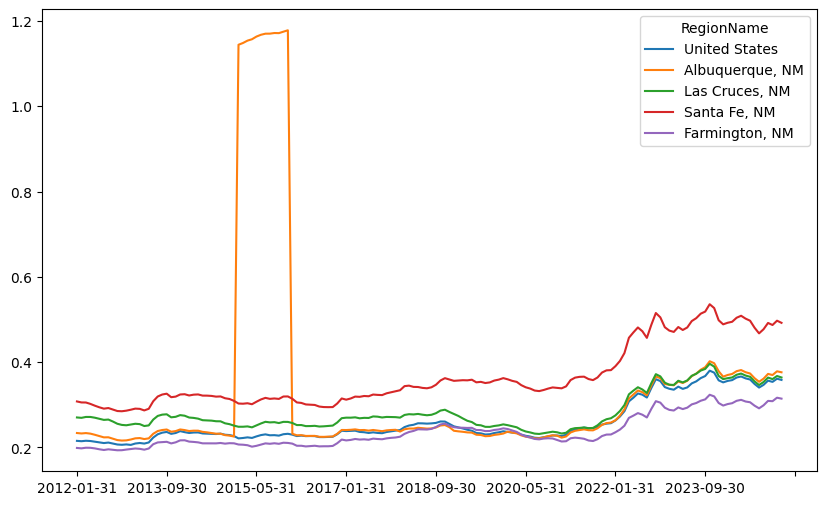

In [9]:
trans_home_afford = chart_nm(df_home_afford, col_exclude, index_col)
trans_home_afford.to_csv("filtered-data/new_homeowner_affordability.csv") # export csv

trans_home_afford.plot(kind="line", figsize=(10,6))

### Total Monthly Downpayment

An estimate of the total monthly payment on a new home purchase with current interest rates. The total monthly payment includes the mortgage payment, homeowner’s insurance, property taxes, and maintenance costs worth 0.5% of the home’s value. The home value is estimated using smoothed and seasonally adjusted ZHVI. If the down payment is less than 20%, the monthly mortgage payment includes 1% mortgage insurance. Homeowners insurance rates and property tax rate estimates vary by region.

In [10]:
csv = "data/Metro_total_monthly_payment_downpayment_0.20_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"

df_monthly_dp = filter_nm(csv, col_name)
df_monthly_dp

,RegionID,SizeRank,RegionName,RegionType,StateName,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,...,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28
0,102001,0,United States,country,NaN,911.438993,909.745555,915.632814,914.553357,909.026623,...,2429.666032,2406.337940,2394.410999,2330.772089,2281.067119,2330.499576,2404.401982,2391.912173,2442.111056,2422.941030
61,394312,62,"Albuquerque, NM",msa,NM,903.484310,900.012644,903.524001,898.523794,888.152238,...,2205.506740,2182.021801,2169.946420,2111.147166,2068.208504,2117.041842,2189.311140,2180.541034,2231.933017,2218.396573
207,394773,214,"Las Cruces, NM",msa,NM,839.029907,836.627285,843.127959,842.858852,837.399337,...,1831.719254,1813.164500,1803.461864,1754.349951,1717.360285,1757.800945,1815.132076,1802.549114,1839.087472,1821.736186
273,395066,284,"Santa Fe, NM",msa,NM,1312.984907,1305.907628,1307.851906,1296.218906,1280.675445,...,3453.938066,3416.894755,3392.099891,3288.430399,3207.446598,3283.432486,3395.092853,3372.017011,3441.963097,3407.207701
323,394588,342,"Farmington, NM",msa,NM,766.793616,763.231399,768.660106,767.596924,761.921378,...,1542.687290,1527.155299,1522.138095,1486.067750,1459.257351,1499.403645,1555.828996,1557.099814,1598.423309,1587.361178


In [11]:
# calculating NM average: recent vs a decade ago

monthly_dp_nm = df_monthly_dp[df_monthly_dp["RegionName"].str.contains("NM")]
recent_nm = monthly_dp_nm["2025-02-28"].mean()
decade_ago_nm = monthly_dp_nm["2015-02-28"].mean() 

monthly_dp_nm_change = (recent_nm - decade_ago_nm) / decade_ago_nm * 100

print(f"As of February 2025, a median household in New Mexico pays ${recent_nm:,.2f} per month on a new home purchase. This is an increase/decrease of {monthly_dp_nm_change:,.2f}% compared to ${decade_ago_nm:,.2f} in 2015.")


As of February 2025, a median household in New Mexico pays $2,258.68 per month on a new home purchase. This is an increase/decrease of 16.38% compared to $1,940.73 in 2015.


In [12]:
# calculating US average: recent vs a decade ago

monthly_dp_us = df_monthly_dp[df_monthly_dp["RegionName"].str.contains("United States")]
recent_us = monthly_dp_us["2025-02-28"].mean()
decade_ago_us = monthly_dp_us["2015-02-28"].mean() 

monthly_dp_us_change = (recent_us - decade_ago_us) / decade_ago_us * 100

print(f"As of February 2025, a median household in the U.S. pays ${recent_us:,.2f} per month on a new home purchase. This is an increase/decrease of {monthly_dp_us_change:,.2f}% compared to ${decade_ago_us:,.2f} in 2015.")


As of February 2025, a median household in the U.S. pays $2,422.94 per month on a new home purchase. This is an increase/decrease of 137.71% compared to $1,019.30 in 2015.


<Axes: >

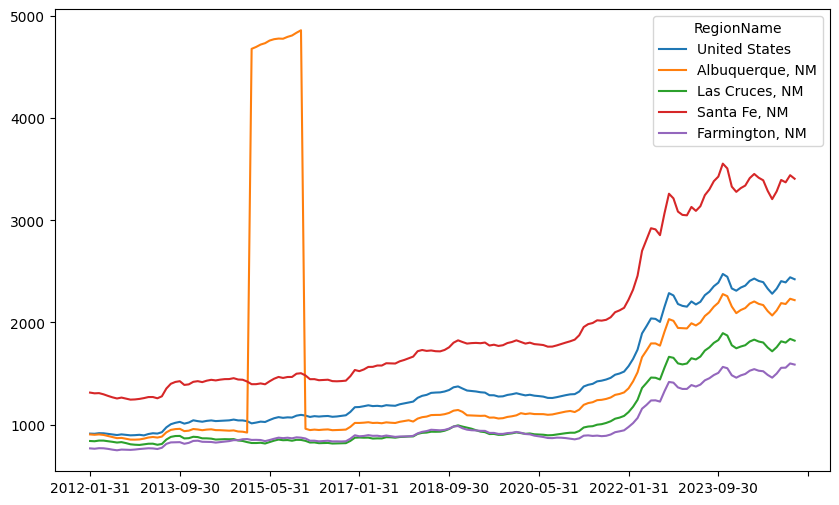

In [13]:
trans_monthly_dp = chart_nm(df_monthly_dp, col_exclude, index_col)
trans_monthly_dp.to_csv("filtered-data/monthly_downpayment.csv") # export csv

trans_monthly_dp.plot(kind="line", figsize=(10,6))

### New Homeowner Income Needed

An estimate of the annual household income required to spend less than 30% of monthly income on the total monthly payment after newly purchasing the typical home with a 20% down payment.

In [14]:
csv = "data/Metro_new_homeowner_income_needed_downpayment_0.20_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"

df_home_income = filter_nm(csv, col_name)
df_home_income

,RegionID,SizeRank,RegionName,RegionType,StateName,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,...,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28
0,102001,0,United States,country,NaN,36457.559717,36389.822190,36625.312563,36582.134278,36361.064915,...,97186.641275,96253.517590,95776.439942,93230.883567,91242.684760,93219.983024,96176.079292,95676.486912,97684.442226,96917.641203
61,394312,62,"Albuquerque, NM",msa,NM,36139.372402,36000.505747,36140.960052,35940.951752,35526.089521,...,88220.269618,87280.872033,86797.856799,84445.886637,82728.340173,84681.673660,87572.445598,87221.641354,89277.320673,88735.862902
207,394773,214,"Las Cruces, NM",msa,NM,33561.196286,33465.091416,33725.118343,33714.354068,33495.973482,...,73268.770175,72526.579996,72138.474541,70173.998039,68694.411406,70312.037800,72605.283036,72101.964561,73563.498866,72869.447424
273,395066,284,"Santa Fe, NM",msa,NM,52519.396298,52236.305124,52314.076259,51848.756229,51227.017800,...,138157.522648,136675.790194,135683.995642,131537.215961,128297.863930,131337.299425,135803.714109,134880.680428,137678.523880,136288.308026
323,394588,342,"Farmington, NM",msa,NM,30671.744658,30529.255965,30746.404221,30703.876963,30476.855119,...,61707.491611,61086.211962,60885.523801,59442.709998,58370.294058,59976.145818,62233.159837,62283.992573,63936.932349,63494.447125


In [15]:
# calculating NM average: recent vs a decade ago

home_income_nm = df_home_income[df_home_income["RegionName"].str.contains("NM")]
recent_nm = home_income_nm["2025-02-28"].mean()
decade_ago_nm = home_income_nm["2015-02-28"].mean() 

home_income_nm_change = (recent_nm - decade_ago_nm) / decade_ago_nm * 100

print(f"As of February 2025, a median household in New Mexico needs an income of ${recent_nm:,.2f} to spend less than 30% of their income for home payment. This is an increase/decrease of {home_income_nm_change:,.2f}% compared to ${decade_ago_nm:,.2f} in 2015.")


As of February 2025, a median household in New Mexico needs an income of $90,347.02 to spend less than 30% of their income for home payment. This is an increase/decrease of 16.38% compared to $77,629.29 in 2015.


In [16]:
# calculating US average: recent vs a decade ago

home_income_us = df_home_income[df_home_income["RegionName"].str.contains("United States")]
recent_us = home_income_us["2025-02-28"].iloc[0]
decade_ago_us = home_income_us["2015-02-28"].iloc[0] 

home_income_us_change = (recent_us - decade_ago_us) / decade_ago_us * 100

print(f"As of February 2025, a median household in the U.S. needs an income of ${recent_us:,.2f} to spend less than 30% of their income for home payment. This is an increase/decrease of {home_income_us_change:,.2f}% compared to ${decade_ago_us:,.2f} in 2015.")


As of February 2025, a median household in the U.S. needs an income of $96,917.64 to spend less than 30% of their income for home payment. This is an increase/decrease of 137.71% compared to $40,772.18 in 2015.


<Axes: >

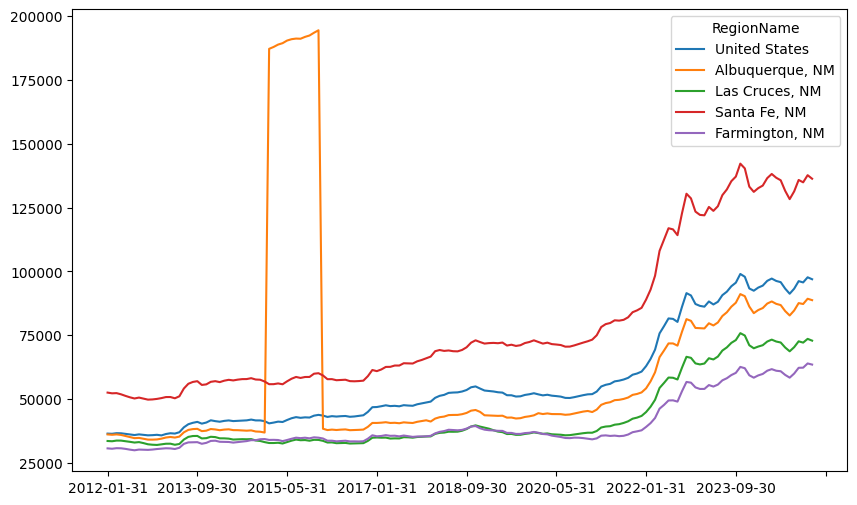

In [17]:
trans_home_income = chart_nm(df_home_income, col_exclude, index_col)
trans_home_income.to_csv("filtered-data/new_homeowner_income_needed.csv") # export csv

trans_home_income.plot(kind="line", figsize=(10,6))

### New Renter Income Needed

An estimate of the household income required to spend less than 30% of monthly income to newly lease the typical rental.

In [18]:
csv = "data/Metro_new_renter_income_needed_uc_sfrcondomfr_sm_sa_month.csv"

df_rent_income = filter_nm(csv, col_name)
df_rent_income

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28
0,102001,0,United States,country,NaN,47802.678249,48022.464595,48260.773401,48455.534196,48633.468875,...,77169.356756,77373.921684,77560.000410,77759.350668,77980.079263,78221.262682,78504.873468,78743.506119,78993.095930,79206.506848
61,394312,62,"Albuquerque, NM",msa,NM,36468.297767,36341.541795,36469.603087,36615.053565,36783.292517,...,62790.368164,63010.994292,63110.897187,63402.052969,63643.852142,63795.735062,63820.900153,64012.995661,64326.375627,64737.166540
209,394773,214,"Las Cruces, NM",msa,NM,32192.151427,32015.199530,32135.694358,32287.017684,32446.605141,...,53721.131334,53911.575208,53678.389840,53974.553032,54094.938188,54385.003526,54279.735846,54412.520029,54486.128580,54571.320314
275,395066,284,"Santa Fe, NM",msa,NM,NaN,NaN,NaN,NaN,NaN,...,80373.802661,80502.680780,81639.290871,82131.290582,82400.332327,82095.272808,82459.624916,82570.123421,82995.031473,82959.235782
324,394588,342,"Farmington, NM",msa,NM,NaN,NaN,NaN,NaN,NaN,...,43569.137613,43731.949102,43840.150201,43896.394061,44681.861738,44299.653906,44527.758408,44501.751263,45619.461075,46544.444444


In [19]:
# calculating NM average: recent vs a decade ago

rent_income_nm = df_rent_income[df_rent_income["RegionName"].str.contains("NM")]
recent_nm = rent_income_nm["2025-02-28"].mean()
decade_ago_nm = rent_income_nm["2015-02-28"].mean() 

rent_income_nm_change = (recent_nm - decade_ago_nm) / decade_ago_nm * 100

print(f"As of February 2025, a median household in New Mexico needs an income of ${recent_nm:,.2f} to spend less than 30% of their income to lease a rental. This is an increase/decrease of {rent_income_nm_change:,.2f}% compared to ${decade_ago_nm:,.2f} in 2015.")


As of February 2025, a median household in New Mexico needs an income of $62,203.04 to spend less than 30% of their income to lease a rental. This is an increase/decrease of 82.00% compared to $34,178.37 in 2015.


In [20]:
# calculating US average: recent vs a decade ago

rent_income_us = df_rent_income[df_rent_income["RegionName"].str.contains("United States")]
recent_us = rent_income_us["2025-02-28"].iloc[0]
decade_ago_us = rent_income_us["2015-02-28"].iloc[0] 

rent_income_us_change = (recent_us - decade_ago_us) / decade_ago_us * 100

print(f"As of February 2025, a median household in the U.S. needs an income of ${recent_us:,.2f} to spend less than 30% of their income to lease a rental. This is an increase/decrease of {rent_income_us_change:,.2f}% compared to ${decade_ago_us:,.2f} in 2015.")


As of February 2025, a median household in the U.S. needs an income of $79,206.51 to spend less than 30% of their income to lease a rental. This is an increase/decrease of 64.94% compared to $48,022.46 in 2015.


<Axes: >

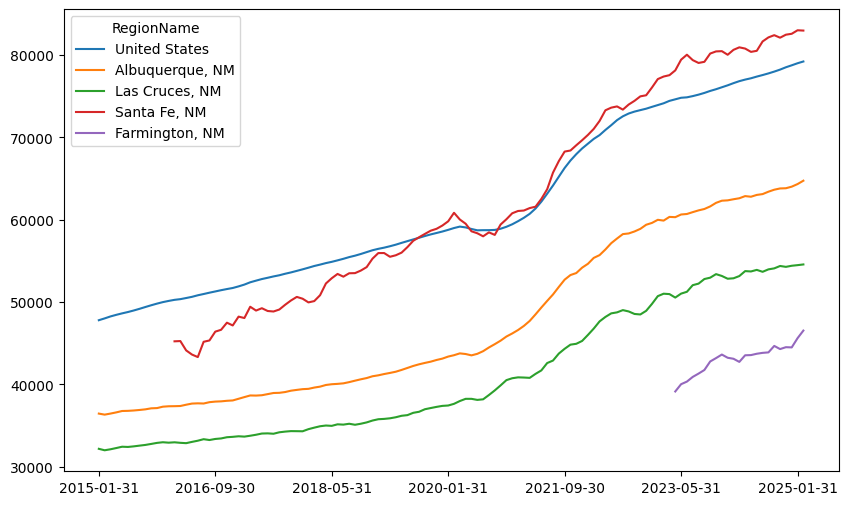

In [21]:
trans_rent_income = chart_nm(df_rent_income, col_exclude, index_col)
trans_rent_income.to_csv("filtered-data/new_renter_income_needed.csv") # export csv

trans_rent_income.plot(kind="line", figsize=(10,6))

### Years to Save

A measure of the number of years it would take the median household to save for a 20% down payment on a home, assuming they are able to save 10% of their income into a simple savings account accruing no interest. This is equivalent to the number of years it would take the median household to save for a 10% down payment, assuming a 5% savings rate.

In [22]:
csv = "data/Metro_years_to_save_downpayment_0.20_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"

df_years_dp = filter_nm(csv, col_name)
df_years_dp

,RegionID,SizeRank,RegionName,RegionType,StateName,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,...,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28
0,102001,0,United States,country,NaN,6.139158,6.126964,6.125115,6.129078,6.136618,...,8.867140,8.858714,8.840380,8.823475,8.808561,8.796537,8.782265,8.773577,8.788836,8.799968
61,394312,62,"Albuquerque, NM",msa,NM,6.982527,6.965463,6.955390,6.941681,6.923404,...,9.460533,9.443709,9.419612,9.403341,9.402207,9.403334,9.404042,9.408669,9.445690,9.478270
207,394773,214,"Las Cruces, NM",msa,NM,8.761664,8.750507,8.768596,8.802315,8.833335,...,9.362526,9.352382,9.331182,9.316927,9.314893,9.312644,9.294912,9.271052,9.273185,9.272434
273,395066,284,"Santa Fe, NM",msa,NM,10.301880,10.245032,10.176842,10.102969,10.063822,...,13.304112,13.288129,13.235406,13.184981,13.158190,13.143367,13.117775,13.090407,13.087923,13.083303
323,394588,342,"Farmington, NM",msa,NM,6.404309,6.386722,6.397518,6.416844,6.435936,...,7.918676,7.911913,7.912001,7.933807,7.960937,7.989377,8.011598,8.058357,8.110294,8.132763


In [23]:
# calculating NM average: recent vs a decade ago

years_dp_nm = df_years_dp[df_years_dp["RegionName"].str.contains("NM")]
recent_nm = years_dp_nm["2025-02-28"].mean()
decade_ago_nm = years_dp_nm["2015-02-28"].mean() 

years_dp_nm_change = (recent_nm - decade_ago_nm) / decade_ago_nm * 100

print(f"As of February 2025, a median household in New Mexico will take {recent_nm:.2f} years to save for a 20% down payment on a home. This is an increase/decrease of {years_dp_nm_change:,.2f}% compared to {decade_ago_nm:.2f} years in 2015.")


As of February 2025, a median household in New Mexico will take 9.99 years to save for a 20% down payment on a home. This is an increase/decrease of 26.08% compared to 7.92 years in 2015.


In [24]:
# calculating US average: recent vs a decade ago

years_dp_us = df_years_dp[df_years_dp["RegionName"].str.contains("United States")]
recent_us = years_dp_us["2025-02-28"].mean()
decade_ago_us = years_dp_us["2015-02-28"].mean() 

years_dp_us_change = (recent_us - decade_ago_us) / decade_ago_us * 100

print(f"As of February 2025, a median household in the U.S. will take {recent_us:.2f} years to save for a 20% down payment on a home. This is an increase/decrease of {years_dp_us_change:,.2f}% compared to {decade_ago_us:.2f} years in 2015.")


As of February 2025, a median household in the U.S. will take 8.80 years to save for a 20% down payment on a home. This is an increase/decrease of 31.27% compared to 6.70 years in 2015.


<Axes: >

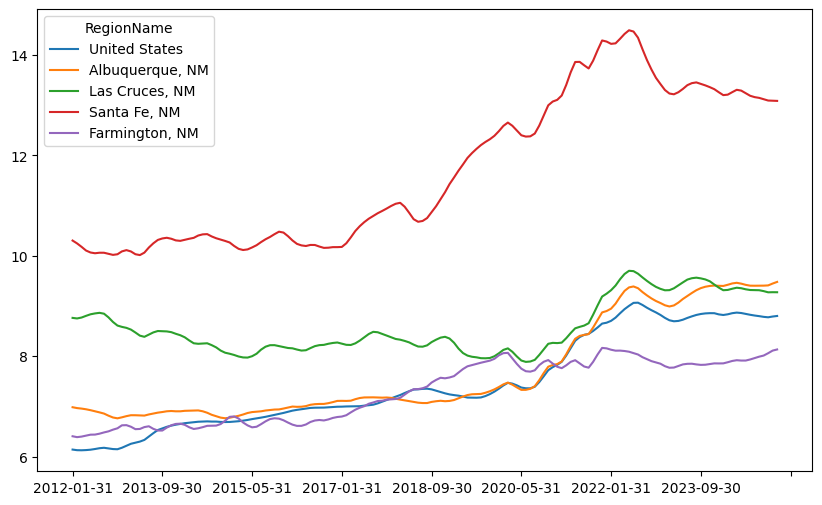

In [25]:
trans_years_dp = chart_nm(df_years_dp, col_exclude, index_col)
trans_years_dp.to_csv("filtered-data/years_to_save_dp.csv") # export csv

trans_years_dp.plot(kind="line", figsize=(10,6))

### Zillow Home Value Index (ZHVI)

A measure of the typical home value and market changes across a given region and housing type. It reflects the typical value for homes in the 35th to 65th percentile range. Available as a smoothed, seasonally adjusted measure and as a raw measure. Zillow also publishes ZHVI for all single-family residences (USD, typical value for all single-family homes in a given region), for condo/coops (USD), for all homes with 1, 2, 3, 4 and 5+ bedrooms (USD).

The datasets used here are ZHVI Single-family Home Time Series.

In [26]:
# metro and US data

csv = "data/Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv"

df_zhvi_us = filter_nm(csv, col_name)
df_zhvi_us.sample(3)

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28
826,394529,861,"Deming, NM",msa,NM,NaN,NaN,NaN,NaN,NaN,...,141553.288645,142740.782142,143580.044223,143934.485005,143006.832348,141919.743910,141321.798574,141504.245315,142325.748748,143255.502736
0,102001,0,United States,country,NaN,120451.345841,120656.817958,120911.757492,121459.280034,122089.507345,...,353238.016723,353881.890501,354094.612275,354379.036946,354865.929802,355507.845848,356080.647630,356876.858264,357561.163562,358055.957813
811,394642,845,"Grants, NM",msa,NM,NaN,NaN,NaN,NaN,NaN,...,133595.390651,133634.896698,133166.549661,132605.174217,132452.534183,132744.973901,133203.618032,134738.095589,135913.925392,137372.080858


In [27]:
# state data

csv = "data/State_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv"

df_zhvi_nm = filter_nm(csv, col_name)
df_zhvi_nm

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28
35,41,36,New Mexico,state,NaN,NaN,NaN,NaN,NaN,NaN,...,297711.17455,298179.638542,298336.270242,298663.044071,299432.719576,300350.221429,301206.046385,302272.928862,303355.760052,304371.197194


In [28]:
# merging metro, US, and state data

df_zhvi_us["StateName"] = df_zhvi_us["StateName"].astype(str)
df_zhvi_nm["StateName"] = df_zhvi_nm["StateName"].astype(str)

df_zhvi = pd.concat([df_zhvi_us, df_zhvi_nm], axis=0, ignore_index=True)
df_zhvi.sample(3)

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28
6,394683,481,"Hobbs, NM",msa,NM,NaN,NaN,NaN,NaN,NaN,...,172738.536982,171591.730141,170367.863252,168920.540822,168076.877678,167796.936508,168198.096731,168863.211826,169872.309449,171179.918093
17,394996,915,"Portales, NM",msa,NM,NaN,NaN,NaN,NaN,NaN,...,144562.621555,143134.702393,141737.462111,140967.583586,141104.568482,141321.130057,141835.642595,143012.550183,144038.594271,144488.782603
14,395100,835,"Silver City, NM",msa,NM,NaN,NaN,NaN,NaN,NaN,...,192171.540480,193179.251659,194064.428421,194281.706168,193184.274956,191112.723547,188490.855433,186702.919105,185096.544519,183749.526994


In [29]:
# calculating NM average: recent vs a decade ago

# average of all metros
zhvi_nm = df_zhvi[df_zhvi["RegionName"].str.contains("NM")]
recent_nm = zhvi_nm["2025-02-28"].mean()
decade_ago_nm = zhvi_nm["2015-02-28"].mean() 

zhvi_nm_change = (recent_nm - decade_ago_nm) / decade_ago_nm * 100

print(f"Calculating the average of metro areas: As of February 2025, the median value of a single-family home in New Mexico is ${recent_nm:,.2f}. This is an increase/decrease of {zhvi_nm_change:,.2f}% compared to ${decade_ago_nm:,.2f} years in 2015.")

print("---")

# this is state (New Mexico data)
zhvi_nm_state = df_zhvi[df_zhvi["RegionName"].str.contains("New Mexico")]
recent_nm_state = zhvi_nm_state["2025-02-28"].mean()
decade_ago_nm_state = zhvi_nm_state["2015-02-28"].mean() 

zhvi_nm_state_change = (recent_nm_state - decade_ago_nm_state) / decade_ago_nm_state * 100

print(f"Average of New Mexico: As of February 2025, the median value of a single-family home in New Mexico is ${recent_nm_state:,.2f}. This is an increase/decrease of {zhvi_nm_state_change:,.2f}% compared to ${decade_ago_nm_state:,.2f} years in 2015.")


Calculating the average of metro areas: As of February 2025, the median value of a single-family home in New Mexico is $263,879.74. This is an increase/decrease of 48.02% compared to $178,269.89 years in 2015.
---
Average of New Mexico: As of February 2025, the median value of a single-family home in New Mexico is $304,371.20. This is an increase/decrease of 84.78% compared to $164,720.99 years in 2015.


In [30]:
# calculating US average: recent vs a decade ago

zhvi_us = df_zhvi[df_zhvi["RegionName"].str.contains("United States")]
recent_us = zhvi_us["2025-02-28"].mean()
decade_ago_us = zhvi_us["2015-02-28"].mean() 

zhvi_us_change = (recent_us - decade_ago_us) / decade_ago_us * 100

print(f"As of February 2025, the median value of a single-family home in the U.S. is ${recent_us:,.2f}. This is an increase/decrease of {zhvi_us_change:,.2f}% compared to ${decade_ago_us:,.2f} years in 2015.")


As of February 2025, the median value of a single-family home in the U.S. is $358,055.96. This is an increase/decrease of 94.93% compared to $183,683.37 years in 2015.


<Axes: >

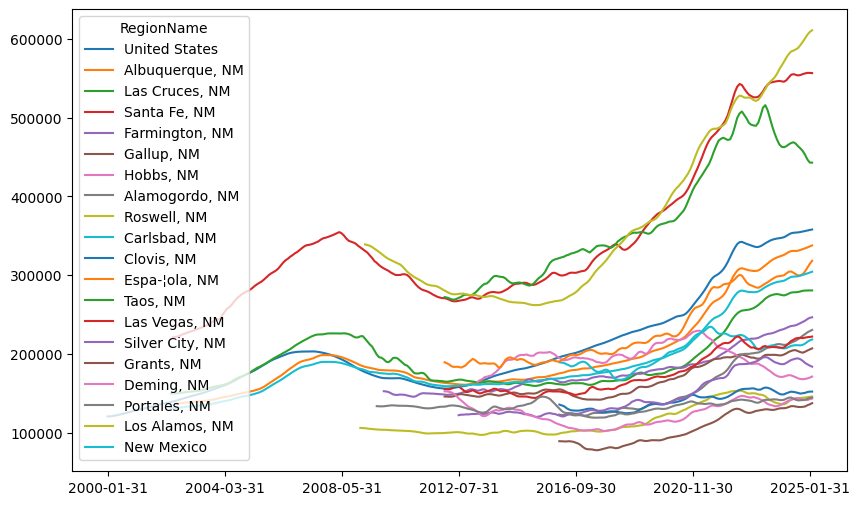

In [31]:
trans_zhvi = chart_nm(df_zhvi, col_exclude, index_col)
trans_zhvi.to_csv("filtered-data/zhvi.csv") # export csv

trans_zhvi.plot(kind="line", figsize=(10,6))